# UBER DATA ANALYSIS WITH PYTHON

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
%matplotlib inline

In [5]:
uData = pd.read_csv("Uber Drives.csv")
uData.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
uData.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [9]:
uData.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [8]:
uData[uData['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [16]:
uData.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [23]:
uData.drop(1155,axis = 0, inplace=True)

In [24]:
uData['START_DATE*'] = pd.to_datetime(uData['START_DATE*'], format='%m/%d/%Y %H:%M')
uData['END_DATE*'] = pd.to_datetime(uData['END_DATE*'], format='%m/%d/%Y %H:%M')

In [25]:
uData.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [43]:
hour = []
day = []
month = []
weekday = []
dayofweek = []

In [44]:
for x in uData['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

In [45]:
uData['HOUR'] = hour
uData['DAY'] = day
uData['MONTH'] = month
uData['DAY OF WEEK'] = dayofweek
uData['WEEK DAY'] = weekday

In [46]:
uData.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,DAY OF WEEK,WEEK DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,2,1,5,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday


##### CATEGORIES WE HAVE

In [54]:
uData['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

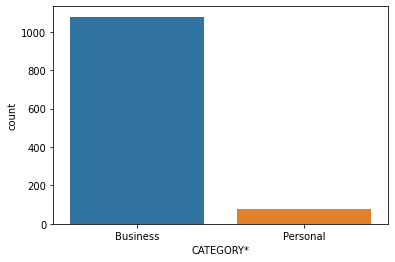

In [58]:
sns.countplot(x = uData['CATEGORY*'],)

In [61]:
uData['MILES*'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES*, dtype: float64

<AxesSubplot:xlabel='MILES*'>

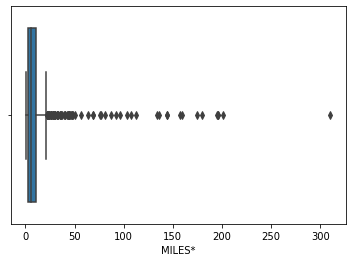

In [63]:
sns.boxplot(x = uData['MILES*'])

<AxesSubplot:xlabel='MILES*', ylabel='Count'>

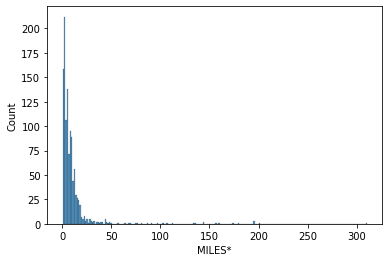

In [65]:
sns.histplot(x = uData['MILES*'])

In [ ]:
# Mostly people take uber for 10 miles and below and longer rarely 

##### WHAT HOUR DO MOST PEOPLE TAKE UBER TO THEIR DESTINATION

In [70]:
uData['HOUR'].value_counts().sort_values(ascending=False)

15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
21    51
9     51
8     35
22    31
23    26
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: HOUR, dtype: int64

<AxesSubplot:>

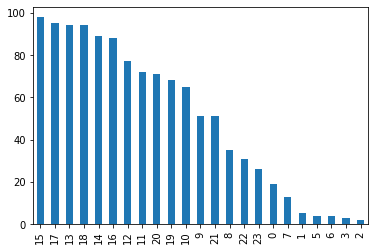

In [74]:
uData['START_DATE*'].dt.hour.value_counts().plot.bar()

In [ ]:
# 3 PM and after, people tend to book uber 

##### CHECK THE PURPOSE OF THE TRIPS

In [76]:
uData['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

<AxesSubplot:>

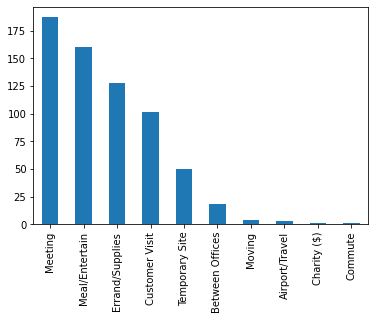

In [77]:
uData['PURPOSE*'].value_counts().plot.bar()

In [ ]:
# People mostly take uber for meetings

##### WHICH DAY HAS THE HIGHEST NUMBER OF TRIPS

In [85]:
uData['WEEK DAY'].value_counts()

Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: WEEK DAY, dtype: int64

<AxesSubplot:>

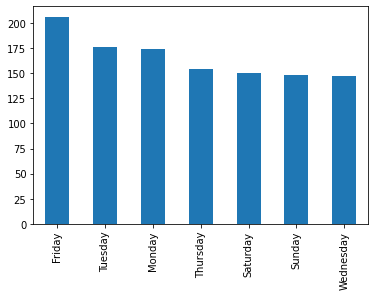

In [84]:
uData['WEEK DAY'].value_counts().plot.bar()

In [ ]:
# People take uber friday compared to the other day

##### WHAT ARE THE NUMBER OF TRIPS PER EACH DAY

In [87]:
uData['DAY'].value_counts()

19    67
29    51
27    51
26    45
22    45
21    45
12    44
1     43
16    42
18    38
20    38
13    37
11    37
8     37
28    36
10    35
25    35
7     34
23    34
6     33
14    33
4     33
5     33
3     33
17    33
30    32
2     30
24    29
9     29
15    28
31    15
Name: DAY, dtype: int64

<AxesSubplot:>

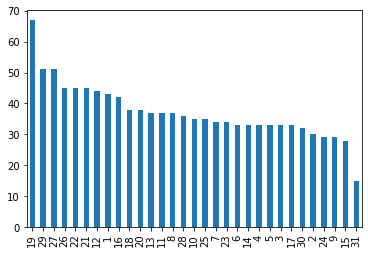

In [86]:
uData['DAY'].value_counts().plot.bar()

In [ ]:
# Day 19 - People take more trips as per data

##### WHAT ARE THE TRIPS IN THE MONTH

In [90]:
uData['MONTH'].value_counts()

12    146
8     133
11    122
2     115
3     113
7     112
6     108
10    106
1      61
4      54
5      49
9      36
Name: MONTH, dtype: int64

<AxesSubplot:>

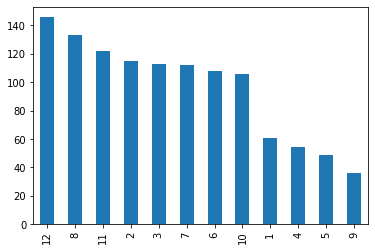

In [91]:
uData['MONTH'].value_counts().plot.bar()

In [ ]:
# People take most trip during December

##### THE STARTING POINTS OF TRIPS

In [99]:
uData['START*'].value_counts()[:40]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
New Orleans          10
Emeryville           10
Downtown              9
Edgehill Farms        8
Central               8
Colombo               8
Orlando               8
San Francisco         8
Banner Elk            8
Hazelwood             7
The Drag              7
Oakland               7
Preston               6
Covington             6
Bryson City           5
South Congress        5
West Berkeley         5
Parkway               5
Noorpur Shahan        5
Fort Pierce           5
Sharpstown            5
Houston               5
Rawalpindi            5
Wayne Ridge           4
Name: START*, dtype: int64

<AxesSubplot:>

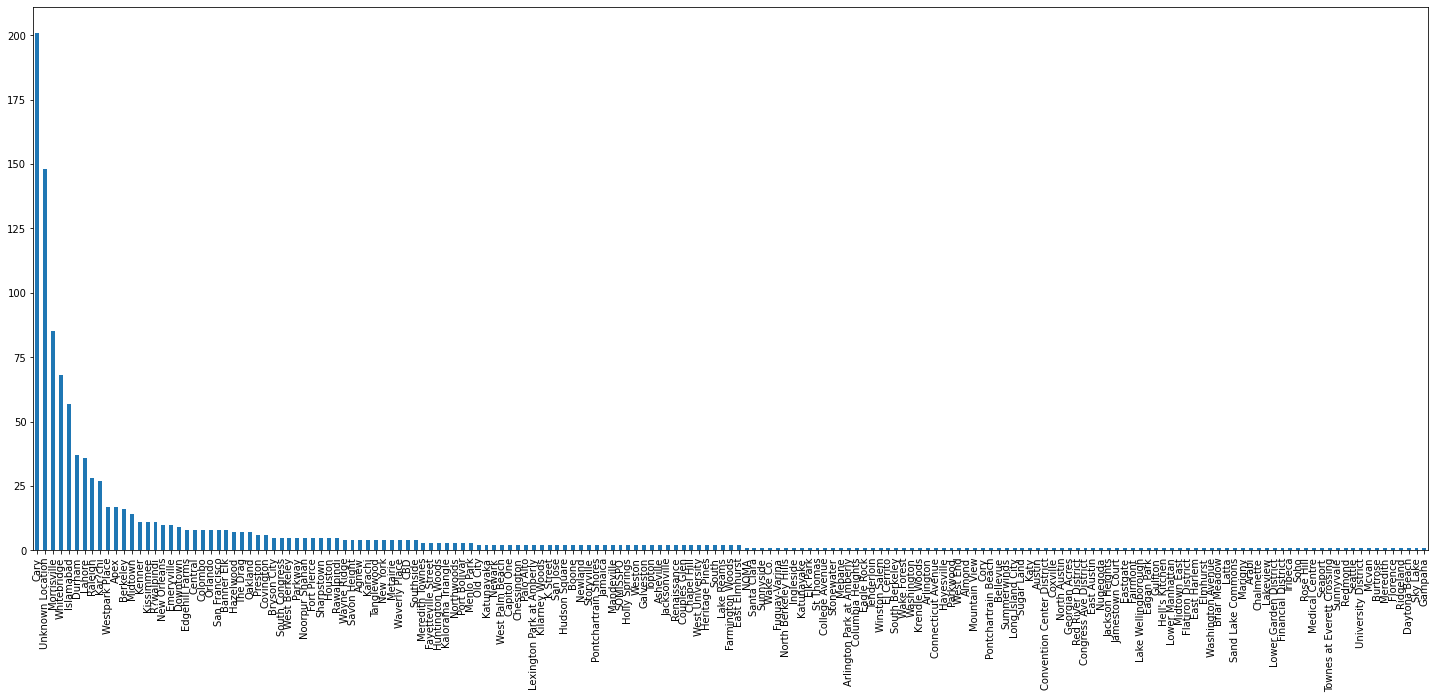

In [102]:
plt.figure(figsize=(25,10))
uData['START*'].value_counts().plot.bar()

In [ ]:
# People mostly start from Cary